# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
Roots = importlib.import_module('Roots')

# Function and Jacobian (Derivative)
$
\begin{equation*}
    \left\{
        \begin{alignedat}{3}
            y&^{x^2+7x+12} & = & 1 \\
            x& + y & = & 6
        \end{alignedat}
    \right.
\end{equation*}$

$
\begin{equation*}
    \left\{
        \begin{alignedat}{3}
        \end{alignedat}
    \right.
\end{equation*}$

## The function of two variables
### Takes a 2-D variable: 
$
\begin{align}
    \vec{v} &= \begin{bmatrix}
           x \\
           y
         \end{bmatrix}
  \end{align}$

In [2]:
def f(v):
    x1 = complex(v[0])
    x2 = complex(v[1])
    y1 = np.power(x2, x1**2 + 7*x1 + 12)
    y2 = x1 + x2
    w = np.array([y1, y2])
    w.shape = (2, 1)
    return w

## The Jacobian
### Takes in a 2-D vector:

In [3]:
    def Jf(v):
        x = complex(v[0])
        y = complex(v[1])
        y_x = np.power(y, x**2 + 7*x + 12)
        y_x_minus = np.power(y, x**2 + 7*x + 11)
        r1 = [(2*x + 7)*y_x*np.log(y),
              (x**2 + 7*x + 12)*y_x_minus]
        r2 = [1, 1]
        return np.array([r1, r2])

In [4]:
    # THE TEST SYSTEM OF EQUATIONS IS...
    #   +--
    #   | y^{x**2 + 12*x + 7}   = 1
    #  <
    #   | x + y                 = 6
    #   +--
    #
    #   ... SO WE'RE TRYING THE FIND THE VALUES OF "x" AND "y" THAT SATISFIES
    #   THAT SYSTEM.
    # WE KNOW THE (x, y) THAT SATISFY THIS SYSTEM OF EQUATIONS ARE...
    # (5, 1)
    # (-3, 9)
    # (-4, 10)
    def FunLinAlgProb(x_start, y, f, Jf, eps):
        [x_vals, y_vals] = Roots.NewtonMethod(x_start, y, f, Jf, eps)
        return [x_vals, y_vals]

In [5]:




def PreProgrammedSols(idx, eps=0.0001):
    # INDEX : INITIAL VECTOR
    v_start = {1: np.array([[3.08], [2.2]]),       # (5, 1)
               2: np.array([[-1.09], [7.8]]),      # (-3, 9)
               3: np.array([[-3.75], [11]]),       # (-4, 10)
               4: np.array([[7.4], [-1.314159]]),  # (7, -1)
               5: np.array([[-5], [-5.0]]),        # (-5.19+1.52i, 11.19-1.52i)
               6: np.array([[-10], [-8]]),         # (-6.12+2.37i, 12.12-2.37i)
               7: np.array([[-10], [-10]]),        # (-5.55-1.86i, 11.55+1.86i)
               8: np.array([[11], [-3.75]]),       # (6.82-0.26i, -0.82+0.26i)
               9: np.array([[2.2], [-2.79]])}      # (6.82-0.26i, -0.82+0.26i)
    #   BANTER
    #    print("Our starting input value is\n{}\n".format(v_start[idx]))
    #   DESIRED OUTPUT VALUE, SHAPED AS A 2X1 VECTOR
    want_val = np.array([1, 6])
    want_val.shape = (2, 1)
    #   BANTER
    #    print("We want the output value\n{}\n".format(want_val))
    #    print("We'll approximate up to {} decimal points\n".format(eps))
    #   THIS ROW GETS THE...
    #
    #  +-> INPUT SOLUTIONS...
    #  |      +-> AND OUTPUT SOLUTIONS...
    #  |      |
    #  V      V
    [x_sol, y_sol] = FunLinAlgProb(v_start[idx], want_val, f, Jf, eps)
    #   EXTRACT ONLY THE REAL INPUT AND OUTPUT APPROXIMATIONS. IF x IS A
    #   VECTOR, THEN IT IS A 2X1 VECTOR COMPOSED OF x1 AND x2, LIKE THIS...
    #            _  _
    #   ->      | x1 |
    #   x   =   |_x2_|
    #   TODO: USE NUMPY TO SIMPLIFY ALL OF THIS. FOR EXAMPLE, JUST
    #   DO x_sol.real!
    x1_vals = [x[0].real for x in x_sol]
    x2_vals = [x[1].real for x in x_sol]
    y1_vals = [y[0].real for y in y_sol]
    y2_vals = [y[1].real for y in y_sol]
    #   START PLOTTING
    #   fig IS THE CANVAS...
    #   axs REPRESENT THE GRAPH(S)...
    #   IN THIS CASE, WE HAVE A FIGURE WITH 2 GRAPHS, AND IT'LL BE DRAWN AS A
    #   SINGLE ROW WITH TWO PLOTS, SIDE BY SIDE (1X2 FIGURE VECTOR). THE ENTIRE
    #   GRAPH WILL BE 11 UNITS IN LENGTH, AND 7 IN HEIGHT. THEY SEEMED LIKE
    #   GOOD PRIME NUMBERS.
    fig, axs = plt.subplots(1, 2, figsize=(11, 7))
    #   THE FIRST PLOT WILL BE A VISUALIZATION OF THE INPUT SPACE SPACE'S REAL
    #   VALUES. THERE WILL BE LABELS AND A TITLE.
    axs[0].plot(x1_vals, x2_vals, 'ro-')
    axs[0].grid()
    axs[0].set(xlabel='x1-label', ylabel='x2-label')
    axs[0].set_title("Input Space")
    #   SAME THING FOR THE OUTPUT SPACE.
    axs[1].plot(y1_vals, y2_vals, 'b*-')
    axs[1].grid()
    axs[1].set(xlabel='y1-label', ylabel='y2-label')
    axs[1].set_title("Output Space")
    #   FOR EVERY INPUT/OUTPUT PAIR IN OUR SOLUTIONS, ANNOTATE THE POINT IF IT
    #   IS AN EVEN POSITION. I HOPE THAT MADE SENSE.
    for ii in range(len(x_sol)):
        if ii % 2 == 0:
            axs[0].annotate(ii, (x1_vals[ii], x2_vals[ii]))
            axs[1].annotate(ii, (y1_vals[ii], y2_vals[ii]))
            #   PRINT OUT THE ACTUAL INPUT VALUE CLOSE TO OUR INITUAL GUESS.
            #   EACH ELEMENT IN EACH VECTOR COULD BE A COMPLEX VALUE.
    print('The solution is x1 = {}, x2 = {}'.format(x1_vals[-1], x2_vals[-1]))
    #   RETURN THE SOLUTION
    return [x_sol, y_sol]


def CompareInOutSpaceCir(r, n_pts):
    inp = []
    out = []
    for rad in np.linspace(0, 2*np.pi, n_pts):
        v = np.array([[r*np.cos(rad)], [r*np.sin(rad)]])
        inp.append(v)
        out.append(f(v))
    plt.plot([v[0].real for v in inp],
             [v[1].real for v in inp])
    plt.plot([v[0].real for v in out],
             [v[1].real for v in out])
    plt.grid()

def CompareInOutSpaceSin(beta, n_pts):
    inp = []
    out = []
    for rad in np.linspace(0, 2*np.pi, n_pts):
        v = np.array([[rad], [np.sin(beta*rad)]])
        inp.append(v)
        out.append(f(v))
    plt.plot([v[0].real for v in inp],
             [v[1].real for v in inp])
    plt.plot([v[0].real for v in out],
             [v[1].real for v in out])
    plt.grid()

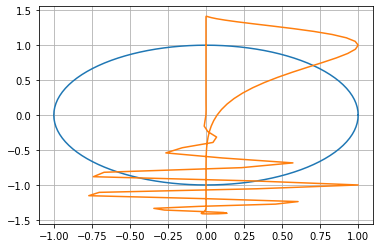

In [6]:
CompareInOutSpaceCir(1, 113)